In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]


In [2]:
!scp sarre:~/sarrespeed.txt ./data/
!scp telco:~/telcospeed.txt ./data/

sarrespeed.txt                                100%   53KB 177.9KB/s   00:00    
telcospeed.txt                                100%   53KB   1.0MB/s   00:00    


In [3]:
s = pd.read_csv("data/sarrespeed.txt", delimiter=" ", 
                 names=['Date', 'Time', 'Type', 'Speed', 'Unit'])
s['Location'] = "Saar"

In [4]:
t = pd.read_csv("data/telcospeed.txt", delimiter=" ", 
                 names=['Date', 'Time', 'Type', 'Speed', 'Unit'])
t['Location'] = "Berlin"

In [5]:
df = pd.concat([t,s])

In [6]:
df['dt'] = pd.to_datetime(df.Date + " " + df.Time)
df

,Date,Time,Type,Speed,Unit,Location,dt
0,2023-01-07,12:40,Download:,438.45,Mbit/s,Berlin,2023-01-07 12:40:00
1,2023-01-07,12:40,Upload:,51.37,Mbit/s,Berlin,2023-01-07 12:40:00
2,2023-01-07,12:50,Download:,438.17,Mbit/s,Berlin,2023-01-07 12:50:00
3,2023-01-07,12:50,Upload:,51.41,Mbit/s,Berlin,2023-01-07 12:50:00
4,2023-01-07,13:10,Download:,420.95,Mbit/s,Berlin,2023-01-07 13:10:00
...,...,...,...,...,...,...,...
1371,2023-01-13,06:01,Upload:,47.06,Mbit/s,Saar,2023-01-13 06:01:00
1372,2023-01-13,06:11,Download:,572.16,Mbit/s,Saar,2023-01-13 06:11:00
1373,2023-01-13,06:11,Upload:,30.92,Mbit/s,Saar,2023-01-13 06:11:00
1374,2023-01-13,06:21,Download:,204.24,Mbit/s,Saar,2023-01-13 06:21:00


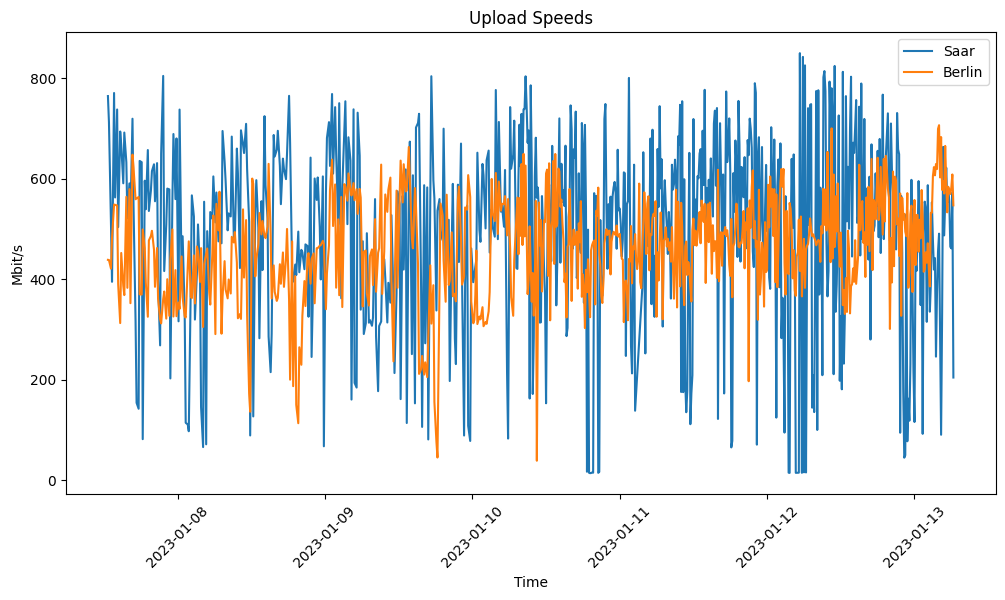

In [7]:
fig, ax = plt.subplots()

ax.plot(df[(df['Type']=='Download:') & (df['Location'] == 'Saar')].dt,
        df[(df['Type']=='Download:') & (df['Location'] == 'Saar')].Speed, label="Saar")
ax.plot(df[(df['Type']=='Download:') & (df['Location'] == 'Berlin')].dt,
        df[(df['Type']=='Download:') & (df['Location'] == 'Berlin')].Speed, label="Berlin")


ax.set_title('Upload Speeds')
ax.set_xlabel('Time')
ax.set_ylabel('Mbit/s')
ax.legend()
plt.xticks(rotation=45)
plt.show()

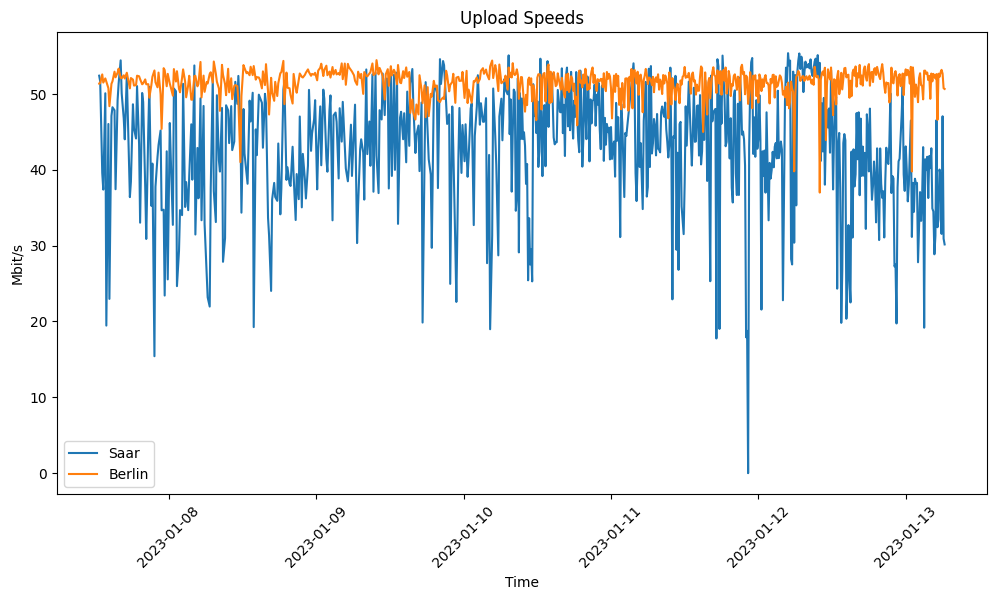

In [8]:
fig, ax = plt.subplots()


ax.plot(df[(df['Type']=='Upload:') & (df['Location'] == 'Saar')].dt,
        df[(df['Type']=='Upload:') & (df['Location'] == 'Saar')].Speed, label="Saar")
ax.plot(df[(df['Type']=='Upload:') & (df['Location'] == 'Berlin')].dt,
        df[(df['Type']=='Upload:') & (df['Location'] == 'Berlin')].Speed, label="Berlin")


ax.set_title('Upload Speeds')
ax.set_xlabel('Time')
ax.set_ylabel('Mbit/s')
ax.legend()
plt.xticks(rotation=45)
plt.show()